# Vegetable price Analysis
An analysis of vegetable price for the year 2023

How are the prices change over time


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from datetime import date as dt
import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv('prices.csv')
df

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40


In [28]:
#Check data types, entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


In [29]:
# summary statistics of all columns
df.describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [30]:
# Checking for missing data
df.isnull().any(axis=0).sum() # for columns
df.isnull().any(axis=1).sum() # for rows
df.isnull().sum()

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

In [31]:
df.kurtosis(numeric_only=True)

Bhindi (Ladies finger)      0.362337
Tomato                    287.000000
Onion                       0.692638
Potato                     -0.731091
Brinjal                     2.857873
Garlic                     -0.008867
Peas                       -0.412516
Methi                     285.356077
Green Chilli                2.141107
Elephant Yam (Suran)        0.930687
dtype: float64

In [32]:
# checking duplicates
df.duplicated().sum()



0

# EDA
Peforming Exploratory Data Analysis


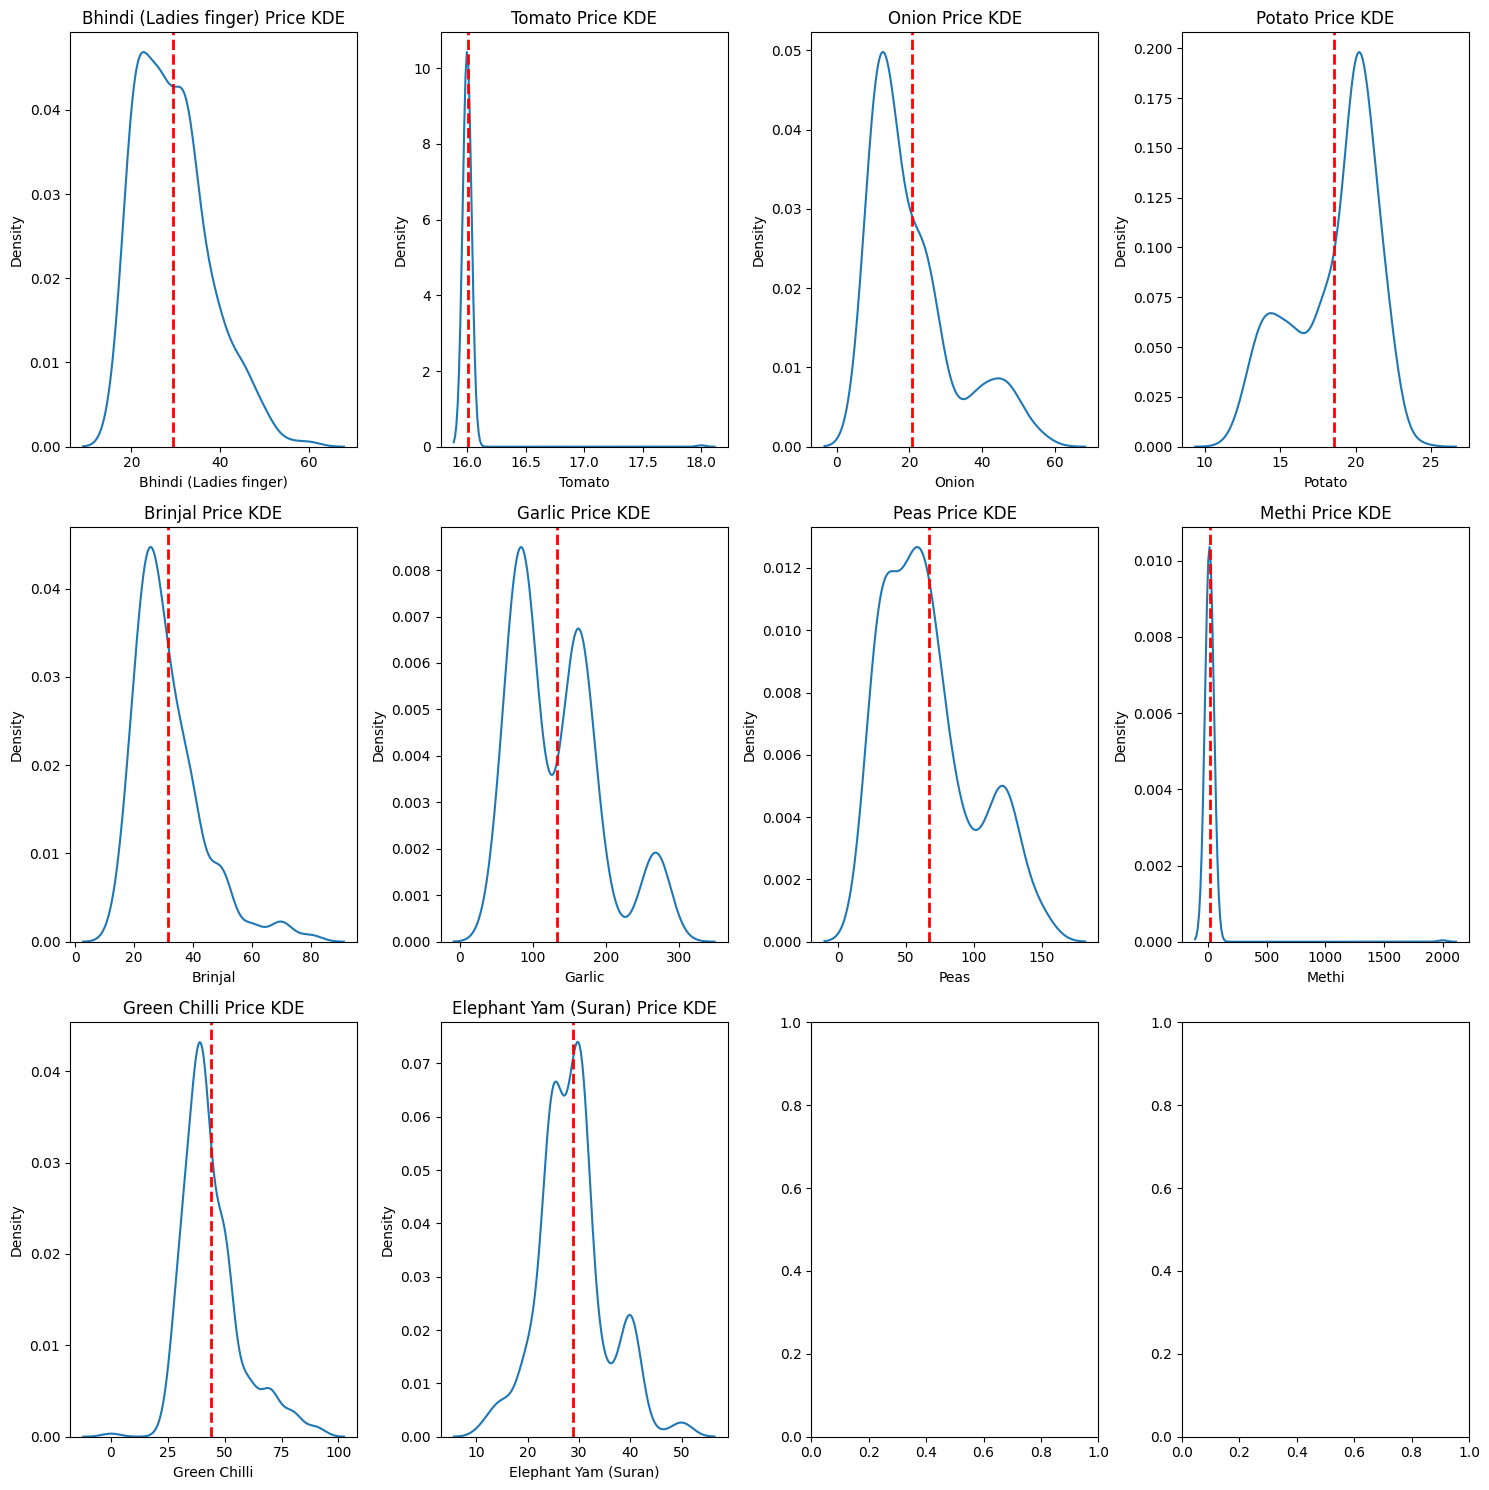

In [33]:
numerical_columns = df.select_dtypes('number')
# Assuming MD_agric_df is already defined with the simulated data

# Setting up a 5x4 grid of plots
fig, axes = plt.subplots(3, 4, figsize=(15, 15))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plotting a KDE for each column in its respective subplot
for i, column in enumerate(numerical_columns.columns):
    mean_val = numerical_columns[column].mean()
    sns.kdeplot(numerical_columns[column], ax= axes[i])
    axes[i].set_title(f"{column} Price KDE")
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2)


plt.tight_layout()
plt.show()

In [34]:
#dates = df["Price Dates"].iloc[3:5]
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')
df['Month'] = df["Price Dates"].dt.month.map(month_map)
df



,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),Month
0,2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25,January
1,2023-01-02,35.0,16,22.0,20,30,55,25,7,40.0,25,January
2,2023-01-03,35.0,16,21.0,20,30,55,25,7,40.0,25,January
3,2023-01-04,30.0,16,21.0,22,25,55,25,7,40.0,25,January
4,2023-01-08,35.0,16,20.0,21,25,55,22,6,35.0,25,January
...,...,...,...,...,...,...,...,...,...,...,...,...
282,2023-12-27,45.0,16,30.0,20,70,260,40,16,40.0,25,December
283,2023-12-28,45.0,16,30.0,20,70,260,30,20,45.0,25,December
284,2023-12-29,45.0,16,30.0,22,80,260,30,18,50.0,25,December
285,2023-12-31,45.0,16,26.0,20,60,250,40,16,50.0,40,December


# Plot line graph over time(month) for each vegetable
# Plot bar graph of average price for each month per vegetable
# plot voilin 

Pointers :
# What we are trying to find out from the data
Which vegetable is the most expensive/cheapest?
Which month has the highest or lowest average?
# Hypothesis testing


In [ ]:
# Mean prices for each month
mean_month = df.groupby('Month').mean(numeric_only=True)



,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Month,,,,,,,,,,
April,30.229167,16.000000,9.354167,15.500000,24.166667,82.291667,67.958333,13.125000,37.922083,27.083333
August,24.040000,16.000000,21.480000,20.200000,31.000000,156.400000,77.200000,9.000000,42.800000,35.640000
December,45.913043,16.000000,35.608696,20.304348,52.173913,267.826087,37.826087,15.086957,35.217391,30.217391
February,35.979167,16.000000,12.187500,14.958333,32.750000,73.750000,31.041667,8.125000,40.083333,27.500000
January,38.277778,16.111111,17.416667,20.388889,39.444444,72.222222,26.166667,10.333333,38.611111,28.333333
July,25.160000,16.000000,16.560000,19.720000,34.200000,143.400000,105.600000,94.320000,73.000000,30.680000
June,23.220000,16.000000,13.720000,20.280000,32.800000,98.000000,64.400000,15.960000,55.200000,24.760000
March,32.980769,16.000000,11.384615,13.615385,22.153846,79.038462,38.461538,7.192308,45.576923,24.961538
May,21.620000,16.000000,10.680000,20.320000,24.400000,92.200000,63.000000,11.520000,37.560000,24.600000
